# 회귀 - 보스톤 주택가격 예측

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=seed
)

- 모델 정의/설정/학습

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1)                        # 회귀인 경우 activation 함수를 지정하지 않음.
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 회귀인 경우 metrics를 지정하지 않음
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=60, verbose=0)

- 학습과정 시각화

In [19]:
y_loss = hist.history['loss'][5:]
y_vloss = hist.history['val_loss'][5:]
xs = np.arange(6, len(y_loss)+6)

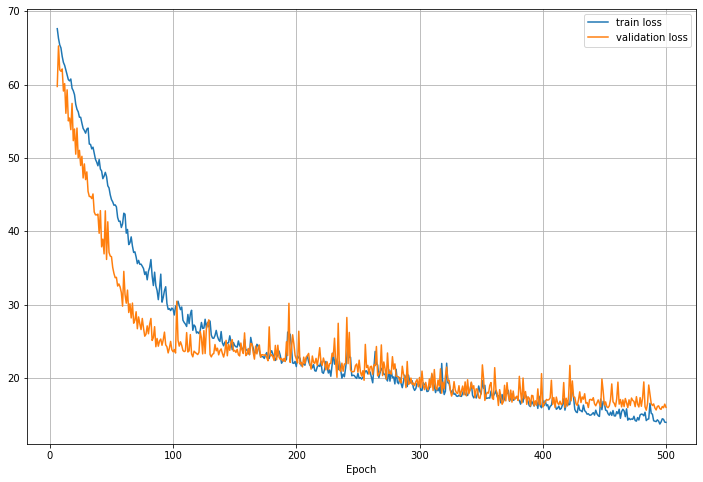

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.grid()
plt.show()

- 평가 및 예측

In [21]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 21.5424


21.5423526763916

In [22]:
pred = model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mse, r2

(21.542356182600056, 0.7433748277074443)

- 예측값과 실제값의 비교

In [26]:
y_test.shape, pred.shape

((51,), (51, 1))

In [28]:
df = pd.DataFrame({
    'y_test':y_test, 'pred':pred.flatten()
})
df.head(10)

,y_test,pred
0,20.1,19.237282
1,11.9,11.178988
2,20.6,19.008606
3,33.2,33.054939
4,20.8,16.322720
5,13.5,8.348247
6,24.7,23.445700
7,13.9,10.444701
8,10.4,12.714694
9,19.7,17.642265


- 테스트 프로그램

In [29]:
index = 30
X_test[index], y_test[index]

(array([1.5876e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01,
        5.9610e+00, 1.7500e+01, 5.2873e+00, 4.0000e+00, 3.0500e+02,
        1.9200e+01, 3.7694e+02, 9.8800e+00]), 21.7)

In [33]:
pred_value = model.predict(X_test[index].reshape(1,-1))
pred_value

array([[19.169706]], dtype=float32)

In [37]:
print(f'실제값: {y_test[index]}, 예측값: {pred_value[0,0]:.2f}')

실제값: 21.7, 예측값: 19.17
